In [1]:
from fvhoe.hydro import advection_dt
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 64
p = 3

solver = EulerSolver(
    w0=square,
    nx=N,
    px=p,
    riemann_solver="advection_upwind",
    fixed_dt=advection_dt(hx=1 / N, vx=1),
)

In [3]:
solver.rkorder(1, save_snapshots=False)

100%|██████████| 1.0/1 [00:01]                 


t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=1.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=1.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=0.00, x=[0.01, 0.99], y=0.50, z=0.50
t=1.00, x=[0.01, 0.99], y=0.50, z=0.50


Text(0.5, 0, '$x$')

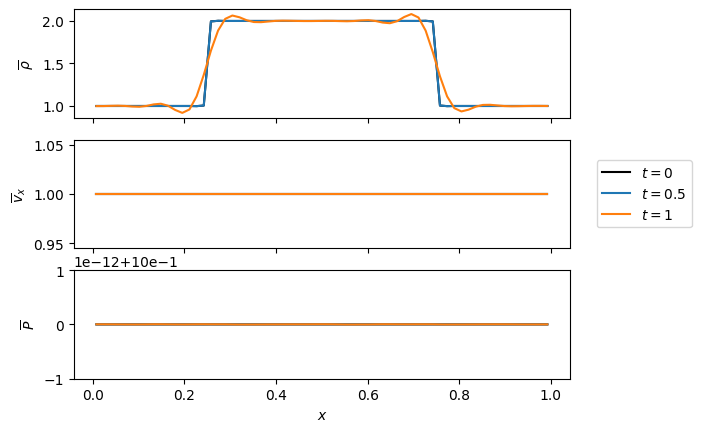

In [4]:
fig, ax = plt.subplots(3, sharex=True)

for i, (var, label) in enumerate(
    zip(
        ["rho", "vx", "P"],
        [r"$\overline{\rho}$", r"$\overline{v}_x$", r"$\overline{P}$"],
    )
):
    solver.plot_1d_slice(ax[i], t=0, color="k", param=var, y=0.5, z=0.5, label=r"$t=0$")
    solver.plot_1d_slice(ax[i], t=0.5, param=var, y=0.5, z=0.5, label=r"$t=0.5$")
    solver.plot_1d_slice(ax[i], t=1, param=var, y=0.5, z=0.5, label=r"$t=1$")
    ax[i].set_ylabel(label)

ax[1].legend(loc="center", bbox_to_anchor=(1.15, 0.5))
ax[2].set_xlabel("$x$")

In [5]:
for n in [0, -1]:
    m_tot = np.sum(solver.snapshots[n]["w"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {solver.snapshot_times[n]}: {m_tot}")

Total mass at time 0: 1.5
Total mass at time 1.0: 1.5
